<a href="https://colab.research.google.com/github/Kh0uloud/Optimization-for-City-Public-Transport-Route/blob/main/Transform_the_problem_into_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Bio_Inspired_Project/Data/data2023_06.csv")

In [4]:
df

,trip_id,ritnumber,sequence,time,stop_id,lat,lon,stop_code,stop_name,departure,classification,seats,operator,passengers,timestamp,elevation
0,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
1,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
2,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,480,NS,158,1687242240,0
3,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
4,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162349,166111090,2985,31,00:46,2512035,51.00164,5.85868,STD,Sittard,STD,2,400,NS,132,1687221960,0
2162350,166111090,2985,31,00:46,2512035,51.00164,5.85868,STD,Sittard,STD,2,400,NS,132,1687221960,0
2162351,166111090,2985,31,00:46,2512035,51.00164,5.85868,STD,Sittard,STD,2,400,NS,132,1687221960,0
2162352,166111090,2985,31,00:46,2512035,51.00164,5.85868,STD,Sittard,STD,2,600,NS,198,1687221960,0


In [27]:
"""
a = 0
for trip_id in df.trip_id.unique():
    df_1 = df[df.trip_id == trip_id].drop_duplicates()
    n_rows = len(df_1)
    if n_rows > a :
        a = n_rows
        max_trip_id = trip_id
"""


df1= df[df.trip_id==max_trip_id]
df1.drop_duplicates(inplace=True)
df1.set_index('sequence')
df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)
#df1.set_index('time', inplace=True)
#df1.sort_index(inplace=True)

<ipython-input-27-d5a0e8b7ba96>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)
<ipython-input-27-d5a0e8b7ba96>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)


In [33]:
df2= df1[['sequence', 'lat', 'lon', 'time', 'passengers']]
df2.passengers = df2.passengers.astype(int)
df2.passengers = df2.groupby('time')['passengers'].transform('sum')
df2.set_index('time', inplace=True)
df2.sort_index(inplace=True)
df2.drop_duplicates(inplace=True)
df2.reset_index(inplace=True)

<ipython-input-33-7bfc5b9ea051>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2.passengers.astype(int)
<ipython-input-33-7bfc5b9ea051>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2.groupby('time')['passengers'].transform('sum')
<ipython-input-33-7bfc5b9ea051>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [34]:
df1

,sequence,time,stop_id,lat,lon,stop_code,stop_name,departure,classification,seats,passengers,timestamp
1037162,8,06:27,2512463,52.675675,6.197807,ZL,Zwolle,ZL,2,400,132,1687242420
1037163,8,06:27,2512463,52.675675,6.197807,ZL,Zwolle,ZL,2,300,99,1687242420
1037164,8,06:27,2512463,52.675675,6.197807,ZL,Zwolle,ZL,2,200,66,1687242420
1037165,8,06:27,2512463,52.675675,6.197807,ZL,Zwolle,ZL,3,420,277,1687242420
1037166,8,06:27,2512463,52.675675,6.197807,ZL,Zwolle,ZL,2,360,118,1687242420
...,...,...,...,...,...,...,...,...,...,...,...,...
1925576,7,06:26,2511592,52.690830,6.197510,MP,Meppel,MP,2,180,59,1687242360
1960896,1,05:47,2511531,53.195950,5.792180,LW,Leeuwarden,LW,2,200,66,1687240020
1960897,1,05:47,2511531,53.195950,5.792180,LW,Leeuwarden,LW,2,300,99,1687240020
1960899,1,05:47,2511531,53.195950,5.792180,LW,Leeuwarden,LW,2,420,138,1687240020


In [35]:
df2

,time,sequence,lat,lon,passengers
0,05:47,1,53.195950,5.792180,362
1,05:48,2,53.189351,5.771869,362
2,05:49,2,53.174847,5.780260,362
3,05:50,2,53.160111,5.787574,362
4,05:51,2,53.145376,5.794829,362
...,...,...,...,...,...
126,08:12,16,51.970820,4.623564,2381
127,08:13,16,51.961574,4.610468,2381
128,08:14,16,51.955578,4.593105,2381
129,08:15,16,51.953265,4.573492,2381


In [19]:
df1.time.unique()

array(['06:27', '06:28', '06:29', '06:30', '06:31', '06:32', '06:33',
       '06:34', '06:35', '06:36', '06:37', '06:38', '06:39', '06:40',
       '06:41', '06:42', '06:43', '06:44', '06:45', '06:46', '06:47',
       '06:48', '06:49', '06:50', '07:49', '07:50', '07:51', '07:52',
       '07:53', '07:54', '07:55', '07:56', '07:57', '07:58', '07:59',
       '08:00', '08:01', '08:02', '08:03', '08:04', '08:05', '08:06',
       '06:51', '06:52', '06:53', '06:54', '06:55', '06:56', '06:57',
       '06:58', '06:59', '07:00', '07:01', '07:02', '07:03', '07:04',
       '07:05', '07:06', '07:07', '07:08', '07:09', '07:10', '07:11',
       '07:12', '07:13', '07:14', '07:15', '07:16', '07:17', '07:18',
       '07:19', '07:20', '07:21', '07:22', '07:23', '07:24', '07:25',
       '07:26', '07:27', '07:28', '07:29', '07:30', '07:31', '07:32',
       '07:33', '07:34', '07:35', '07:36', '07:37', '07:38', '07:39',
       '07:40', '07:41', '07:42', '07:43', '07:44', '07:45', '07:46',
       '07:47', '07:

In [36]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6367 * c  # Radius of earth in kilometers. Use 3956 for miles
    return km

In [37]:
# Calculate distance
df2.lon = df2.lon.astype(float)
df2.lat = df2.lat.astype(float)

df2['lonshift'] = df2['lon'].shift(1)
df2['latshift'] = df2['lat'].shift(1)

df2['distance'] = df2.apply(lambda x: haversine(x['lonshift'], x['latshift'], x['lon'], x['lat']), axis=1)

df2.drop(['lonshift', 'latshift'], axis=1, inplace=True)
df2.distance[0]= 0

<ipython-input-37-9a745c2cabf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.lon = df2.lon.astype(float)
<ipython-input-37-9a745c2cabf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.lat = df2.lat.astype(float)
<ipython-input-37-9a745c2cabf4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [61]:
df3=df2[['sequence', 'distance', 'passengers']]
df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
df3.drop_duplicates(inplace=True)
df3['time']= df2['time']
df3

<ipython-input-61-b15486d58b70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
<ipython-input-61-b15486d58b70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace=True)
<ipython-input-61-b15486d58b70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

,sequence,distance,passengers,time
0,1,0.000000,362,05:47
1,2,27.142797,362,05:48
17,3,1.706951,362,06:04
18,4,21.502935,362,06:05
30,5,1.738524,362,06:17
31,6,12.400052,362,06:18
39,7,1.561380,362,06:26
40,8,25.357425,1265,06:27
55,9,1.675189,1265,06:42
56,10,63.765325,2400,06:51


In [69]:
df3.sequence[17], len(df3)

('3', 17)

Take several paths and choose which to adapt

In [72]:
df3['sequence'] = df3['sequence'].astype(str)

# Apply the function to the "sequence" column
df3['sequence'] = df3['sequence'].apply(lambda x: x + " - " + df3['sequence'].shift(-1) if x!=df3['sequence'].iloc[-1] else 'NaN')

# Drop the last row since it will have NaN value after shifting
df3 = df3.iloc[:-1]

# Display the updated DataFrame
print(df3)

<ipython-input-72-e9480d90b544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sequence'] = df3['sequence'].astype(str)


AttributeError: ignored

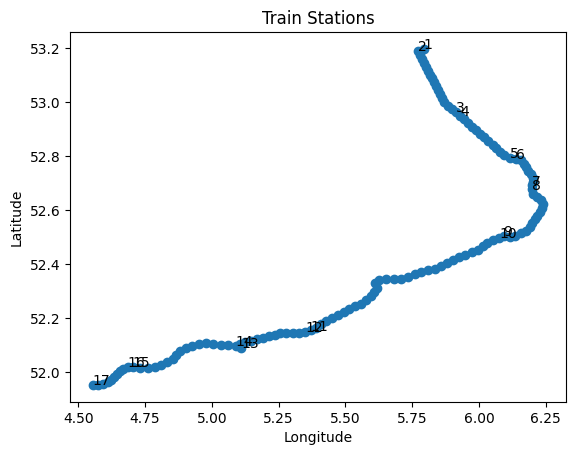

In [51]:
# Extract longitude and latitude coordinates
longitudes = list(df2.lon)
latitudes = list(df2.lat)

# Plot the train stations
plt.scatter(longitudes, latitudes)

# Add labels to each point
a=0
for index, row in df2.iterrows():
    if row['sequence'] != a:
        plt.annotate(row['sequence'], (row['lon'], row['lat']))
        a= row['sequence']

# Set plot title and axis labels
plt.title('Train Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

In [52]:
df3

,sequence,distance,passengers,time
0,1,0.000000,362,05:47
1,2,27.142797,362,05:48
17,3,1.706951,362,06:04
18,4,21.502935,362,06:05
30,5,1.738524,362,06:17
31,6,12.400052,362,06:18
39,7,1.561380,362,06:26
40,8,25.357425,1265,06:27
55,9,1.675189,1265,06:42
56,10,63.765325,2400,06:51
